Agregar descriptiva de a base de datos

# Autenticador Drive

In [ ]:
# vincular colab con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#Librerias

In [1]:
# @title Instalar libreria
!pip install sweetviz
!pip install category_encoders

In [2]:
import os
import re
import math
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw

# Funciones

In [3]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)

# Ruta de datos

In [4]:
# ruta de la carpeta donde están guardadas las bases de datos
path="DATOS/"

# Base de datos

In [5]:
import polars as pl # librería para trabajar con dataframes grandes

In [6]:
%pip install fastexcel # librería para leer archivos excel grandes

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [7]:
# cargamos cada una de las bases de datos
bbdd1 = pl.read_excel(path+"2019 unificado.xlsx")
bbdd2 = pl.read_excel(path+"2020 unificado.xlsx")
bbdd3 = pl.read_excel(path+"2021 unificado.xlsx")
bbdd4 = pl.read_excel(path+"2022 unificado.xlsx")
bbdd5 = pl.read_excel(path+"2023 unificado.xlsx")
bbdd6 = pl.read_excel(path+"2024 unificado.xlsx")



In [8]:
# Realizo una transformación de los dataframes a pandas para poder trabajar con ellos
bbdd1 = bbdd1.to_pandas()
bbdd2 = bbdd2.to_pandas()
bbdd3 = bbdd3.to_pandas()
bbdd4 = bbdd4.to_pandas()
bbdd5 = bbdd5.to_pandas()
bbdd6 = bbdd6.to_pandas()

In [9]:
# Rename columns, removing whitespace
def clean_column_names(df):
  new_columns = []
  for col in df.columns:
    new_col = col.strip() # removes leading/trailing whitespaces
    new_columns.append(new_col)
  df.columns = new_columns
  return df

bbdd2 = clean_column_names(bbdd2)
bbdd3 = clean_column_names(bbdd3)
bbdd4 = clean_column_names(bbdd4)
bbdd5 = clean_column_names(bbdd5)
bbdd6 = clean_column_names(bbdd6)

In [10]:
bbdd_final = pd.concat([bbdd6])

In [ ]:
bbdd_final.PROD.value_counts()

In [ ]:
bbdd_final[bbdd_final.prod]

In [ ]:
bbdd_final.info()

# Limpieza de datos

In [ ]:
bbdd_final.head(3)

In [ ]:
# muestra los datos únicos dentro de una variable
bbdd_final.NIT.unique()

In [ ]:
# después de analizar cuales columnas no nos interesan, las eliminamos
#nivel.drop(columns=['Latitud', 'Longitud', 'Altitud','Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
#                    'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta','DescripcionSerie', 'Frecuencia',
#                    'Grado','Calificador', 'NivelAprobacion'], inplace=True)

In [ ]:
bbdd_final.info()

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {bbdd_final.shape}")

In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(bbdd_final.dtypes)

In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(bbdd_final.nunique())

In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(bbdd_final.isnull().sum())

In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(bbdd_final)
df_analizado

In [ ]:
# @title Realizamos la descriptiva estadística
bbdd_final.describe()

In [11]:
bbdd_final = pd.concat([bbdd1, bbdd2, bbdd3, bbdd4, bbdd5, bbdd6])

bbdd2 = bbdd_final.dropna()
bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2251603767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)


In [31]:
# @title Análisis exploratorio de datos (EDA)
sw.config_parser.read_string("""
                                [Output_Defaults]
                                html_layout = widescreen
                                html_scale = 1.0
                                notebook_layout = widescreen
                                notebook_scale = 0.9
                                notebook_width = 100%
                                notebook_height = 700
                                [Layout]
                                show_logo = 0
                                """)
productos_selec = ['2709', '2701' , '7108', '2710', '0803', '2704', '7610', '7202', '0603', '0901', '0810', '3004', '3304', '3305', '3923', '6104', '6204', '6212']
# productos_selec = ['2709']
for producto in productos_selec:
  #Configurar las opciones de visualizacion Sweetviz
  bbdd2 = bbdd_final.dropna()
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
  BBDD2_ = bbdd2[bbdd2.PROD==producto]
  BBDD2_.drop(columns=['PROD'], inplace=True)
  
  nombre = 'ANÁLISIS DE GRÁFICOS '+producto
  advert_report = sw.analyze([BBDD2_, nombre]) # Realizamos el análisis de la base de datos inicial

  #@markdown Guardar y mostrar reporte formato HTML
  advert_report.show_html('EDA_df'+producto+'.html') # Mostramos el reporte en formato HTML

  #@markdown Descarga y abre el reporte en una nueva pestaña del navegador
  # files.download('/content/EDA_df'+producto+'.html')

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df2709.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df2701.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df7108.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df2710.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df0803.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df2704.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df7610.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df7202.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df0603.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df0901.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df0810.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df3004.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df3304.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df3305.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df3923.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df6104.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df6204.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\2907646532.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df6212.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

In [13]:
%pip install rdt # librería para realizar predicciones de forma rápida - coodificación de las variables categóricas y numéricas

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [14]:
%pip install flaml # librería para realizar predicciones de forma rápida - optimización de hiperparámetros

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [ ]:
bbdd2.PROD.value_counts()

In [ ]:
bbdd_final.PROD.value_counts()[:10] # identificamos la variable objetivo

In [ ]:
bbdd_final.PROD.value_counts().index

In [15]:
bbdd_final = pd.concat([bbdd1, bbdd2, bbdd3, bbdd4, bbdd5, bbdd6]) # concatenamos las bases de datos

In [ ]:
import matplotlib.pyplot as plt

N = 20  # Cambia el número según lo que necesites
top_productos = bbdd1.PROD.value_counts().nlargest(N)
print(top_productos)


top_productos.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Productos con mayor participación")
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


In [ ]:
BBDD2_.columns

In [19]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Transformador de datos
from rdt import HyperTransformer  # Asegúrate de que rdt esté instalado con `pip install rdt`

# AutoML para regresión
from flaml import AutoML  # Asegúrate de que FLAML esté instalado con `pip install flaml`


In [ ]:
# BBDD2_.loc[y_test.index]

In [120]:
data_to_save['y_pred'][2].shape


(1197,)

In [119]:
BBDD2_['Proyección'].loc[y_test.index].shape

(1220,)

In [117]:
y_test.shape

(1197,)

In [122]:
num_pre

2

In [123]:
data_to_save['y_pred'][num_pre].shape

(1197,)

In [135]:
y_test.index.shape

(1197,)

In [143]:
BBDD2_['Proyección'].loc[y_test.index].shape

(1220,)

In [ ]:
BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()

In [142]:
len(y_test.index.tolist())

1197

In [141]:
BBDD2_['Proyección'][y_test.index.tolist()]

403748    0
364238    0
324148    0
486141    0
455767    0
         ..
487082    0
34011     0
455760    0
323899    0
323112    0
Name: Proyección, Length: 1220, dtype: int64

In [136]:
BBDD2_['Proyección'].loc[y_test.index].shape

(1220,)

In [144]:
bbdd_final.reset_index(drop=True, inplace=True)

In [149]:
y_test.index

Index([ 403748, 3242337, 3202247,  486141, 3333866, 2448724, 2535997, 3120384,
       2956477, 2699421,
       ...
       3158153, 2412509, 3333882, 2448745, 2540871,  487082, 2912110, 3333859,
       2703053,  323112],
      dtype='int64', length=1197)

In [ ]:
data_to_save['y_pred']

5

In [152]:
len(data_to_save['y_pred'][num_pre].tolist())

7217

In [148]:
BBDD2_['Proyección'].loc[y_test.index].shape

(1197,)

In [160]:
productos_selec = ['2709', '7108', '0901', '0803', '0603']
# 2709 - 0
# 7108 - 2
# 0901 - 2 - otro
# 0803 - 4
# 0603 - 0 - otro
# automl_best_estimator_ = list()
# automl_best_estimator_ = list()
# y_pred_ = list()
# r2_ = list()
# rmse_ = list()
# mae_ = list()
num_pre = 0
for producto in productos_selec:
    
    bbdd2 = bbdd_final.dropna()
    bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
    BBDD2_ = bbdd2[bbdd2.PROD==producto]
    BBDD2_.drop(columns=['PROD'], inplace=True)

    # 3️⃣ Eliminar filas con valores nulos
    df = BBDD2_.dropna()

    # 4️⃣ Separar variable objetivo
    target_column = "FOBDOL"
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 5️⃣ Crear el transformador RDT 🚀
    ht = HyperTransformer()

    # 6️⃣ Detectar configuración automáticamente ✅
    ht.detect_initial_config(X)

    # 7️⃣ Ajustar y transformar los datos 🔄
    ht.fit(X)
    X_transformed = ht.transform(X)

    # 8️⃣ Convertir a DataFrame para visualizar 🔍
    X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

    # 9️⃣ Mostrar comparación antes y después de la transformación
    print("🔹 Datos originales:")
    print(X.head())

    print("\n🔹 Datos transformados:")
    print(X_transformed.head())

    # 🔟 Separar en entrenamiento y prueba con partición de 80% de entrenamiento y 20% de validación
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    a = pd.DataFrame(BBDD2_.groupby(by=['COD_PAI4']).size().sort_values(ascending=False)).rename(columns={0: 'Cantidad'})
    b = pd.DataFrame(np.round(BBDD2_.groupby(by=['COD_PAI4']).size().sort_values(ascending=False)/BBDD2_.groupby(by=['COD_PAI4']).size().sum()*100, 2)).rename(columns={0: '% Cantidad'})
    c = pd.DataFrame(BBDD2_.groupby(by=['COD_PAI4'])['FOBDOL'].sum().sort_values(ascending=False)).rename(columns={'FOBDOL': 'USD$ FOB'})
    d = pd.DataFrame((BBDD2_.groupby(by=['COD_PAI4'])['FOBDOL'].sum().sort_values(ascending=False)/BBDD2_.groupby(by=['COD_PAI4'])['FOBDOL'].sum().sum())*100).round(2).rename(columns={'FOBDOL': '% USD$ FOB'})
    e = pd.DataFrame(BBDD2_.groupby(by=['COD_PAI4'])['FOBDOL'].sum().sort_values(ascending=False)/6).round(2).rename(columns={'FOBDOL': 'Promedio de USD$ FOB'})
    f = pd.DataFrame(BBDD2_.loc[y_test.index].groupby(by=['COD_PAI4'])['FOBDOL'].sum().sort_values(ascending=False)).rename(columns={'FOBDOL': 'Real USD$ FOB'})

    BBDD2_['Proyección'] = 0
    BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
    g = pd.DataFrame(BBDD2_.loc[y_test.index].groupby(by=['COD_PAI4'])['Proyección'].sum().sort_values(ascending=False)).round(2).rename(columns={'Proyección': 'Proyección USD$ FOB'})

    tabla_org = pd.concat([a, b, c, d, e, f, g], axis=1).reset_index()

    tabla_org['% Presicion'] = ((tabla_org['Proyección USD$ FOB']/tabla_org['Real USD$ FOB'])*100).round(2)

    tabla_org.to_excel('tabla_org'+producto+'.xlsx', index=False)
    num_pre += 1

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
       FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
20555  1901    40  589      PER        40     TCO      0    1      169      1   
20556  1901    40  589      PER        40     TCO     86    1      169      1   
21034  1901    48   27      ABW         0     CVE      0    1      169      1   
22671  1901    48  215      CHN         0     CVE      0    1      169      1   
24274  1901    48  249      USA         0     CVE      0    1      169      1   

       ...  UNID  CODUNI2      CANTI          PNK        FOBPES  AGRENA  \
20555  ...    67       M3   19033.10   17596635.0  1.887009e+10     0.0   
20556  ...    67       M3    9222.00    8526000.0  9.112971e+09     0.0   
21034  ...    67       M3   79074.04   73106187.0  8.200577e+10     0.0   
22671  ...    67       M3  893669.36  826222614.0  9.032420e+11     0.0   
24274  ...    67       M3  903934.88  835713375.0  9.541110e+11     0.0   

       FLETES SEGURO  OTROSG  \
20555     

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'] = 0
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1614034.029524463, 30171625.405198064, 1527107.

🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
3795  1901     3  245      ESP         3     BOG     11    4      245      1   
4434  1901     3  249      USA         3     BOG     11    4      169      1   
4442  1901     3  249      USA         3     BOG     11    4      169      1   
5652  1901     3  249      USA         3     BOG     17    4      169      1   
5653  1901     3  249      USA         3     BOG     17    4      169      1   

      ...  UNID  CODUNI2  CANTI    PNK        FOBPES  AGRENA  FLETES SEGURO  \
3795  ...    33       KG   3.52   3.52  4.078438e+08     0.0     0.0    0.0   
4434  ...    33       KG   4.49   4.49  5.231243e+08     0.0     0.0    0.0   
4442  ...    33       KG   5.75   5.75  6.408555e+08     0.0     0.0    0.0   
5652  ...    33       KG   1.73   1.73  2.074007e+08     0.0     0.0    0.0   
5653  ...    33       KG  14.00  14.00  1.745118e+09     0.0     0.0    0.0   

      OTROSG            

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'] = 0
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[231726.71322310512, 41430.990223584064, 3252547

🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
129   1901     3   23      DEU         3     BOG     25    4      245      1   
233   1901     3   27      ABW         3     BOG     66    4      211      1   
382   1901     3   69      AUS         3     BOG     25    4      249      1   
1279  1901     3  169      COL         3     BOG     11    3      169      1   
1280  1901     3  169      COL         3     BOG     11    3      169      1   

      ...  UNID  CODUNI2   CANTI     PNK       FOBPES  AGRENA  FLETES SEGURO  \
129   ...    33       KG  2485.0  2485.0  37456186.32     0.0  3082.0   0.00   
233   ...    33       KG  2000.0  2000.0  46800144.00     0.0     0.0   0.00   
382   ...    33       KG   139.0   139.0  45249279.58     0.0   989.0  90.14   
1279  ...    33       KG   144.0   144.0   5944552.64     0.0     0.0   0.00   
1280  ...    33       KG    76.5    76.5   2266376.23     0.0     0.0   0.00   

      OTROSG      

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'] = 0
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[117968.31703244972, 103700.32562396163, 346778.

🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
3     1901     3   23      DEU         3     BOG      5    4       23      1   
121   1901     3   23      DEU         3     BOG     25    4      105      1   
420   1901     3   87      BEL         3     BOG      5    4      245      1   
3649  1901     3  244      ARE         3     BOG     25    4      275      1   
3696  1901     3  245      ESP         3     BOG      5    4      245      1   

      ...  UNID  CODUNI2   CANTI     PNK       FOBPES  AGRENA  FLETES SEGURO  \
3     ...    33       KG     6.0     6.0     93235.34   29.50     0.0    0.0   
121   ...    33       KG  3618.0  3618.0  55295255.66    0.00     0.0    0.0   
420   ...    33       KG    45.0    45.0    656598.03  207.75     0.0    0.0   
3649  ...    33       KG     6.0     6.0     18903.48    0.00     0.0    0.0   
3696  ...    33       KG   120.0   120.0   1707945.00  540.40     0.0    0.0   

      OTROSG      

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'] = 0
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4313354.174976301, 30430.354828209413, 33827.24

🔹 Datos originales:
    FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
11  1901     3   23      DEU         3     BOG      5    4      249      1   
12  1901     3   23      DEU         3     BOG      5    4      253      1   
17  1901     3   23      DEU         3     BOG     11    4       23      1   
19  1901     3   23      DEU         3     BOG     11    4       23      1   
20  1901     3   23      DEU         3     BOG     11    4       23      1   

    ...  UNID  CODUNI2    CANTI     PNK       FOBPES   AGRENA  FLETES SEGURO  \
11  ...    11        U   2275.0   390.0   2782047.73     0.00     0.0    0.0   
12  ...    11        U   1800.0   226.0   3464117.80     0.00     0.0    0.0   
17  ...    11        U   5180.0   407.5   5297353.14  1568.95     0.0    0.0   
19  ...    11        U  13650.0   379.0   7011898.32     0.00     0.0    0.0   
20  ...    11        U  56000.0  1795.0  28579336.70     0.00     0.0    0.0   

    OTROSG                    

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'] = 0
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_['Proyección'].loc[y_test.index] = data_to_save['y_pred'][num_pre].tolist()
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3462544145.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1148.8325777459606, 24022.480237154406, 1148.83

In [159]:
len(data_to_save['y_pred'][0].tolist())

123

In [157]:
BBDD2_['Proyección'].loc[y_test.index].shape

(123,)

Index([226766, 314329, 313517, 445905, 264497, 356876, 149171,  21034, 215471,
       143919,
       ...
       478149,  67628, 356980, 105222, 227584, 441216, 146160, 482494,  26560,
       187280],
      dtype='int64', length=123)

In [163]:
productos_selec

['2709', '7108', '0901', '0803', '0603']

In [162]:
data_to_save['r2']

[0.9960903107446326,
 0.9737749318514262,
 0.9952387655031527,
 0.9948049263490016,
 0.996618313828127]

In [146]:
data_to_save = {
    "automl_best_estimator": automl_best_estimator_,
    "y_pred": y_pred_,
    "r2": r2_,
    "rmse": rmse_,
    "mae": mae_,
}


C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
       FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
20555  1901    40  589      PER        40     TCO      0    1      169      1   
20556  1901    40  589      PER        40     TCO     86    1      169      1   
21034  1901    48   27      ABW         0     CVE      0    1      169      1   
22671  1901    48  215      CHN         0     CVE      0    1      169      1   
24274  1901    48  249      USA         0     CVE      0    1      169      1   

       ...  UNID  CODUNI2      CANTI          PNK        FOBPES  AGRENA  \
20555  ...    67       M3   19033.10   17596635.0  1.887009e+10     0.0   
20556  ...    67       M3    9222.00    8526000.0  9.112971e+09     0.0   
21034  ...    67       M3   79074.04   73106187.0  8.200577e+10     0.0   
22671  ...    67       M3  893669.36  826222614.0  9.032420e+11     0.0   
24274  ...    67       M3  903934.88  835713375.0  9.541110e+11     0.0   

       FLETES SEGURO  OTROSG  \
20555     

d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


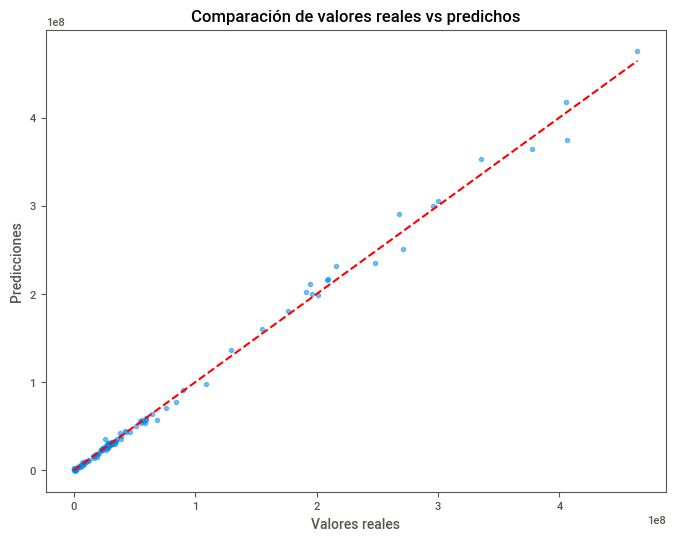

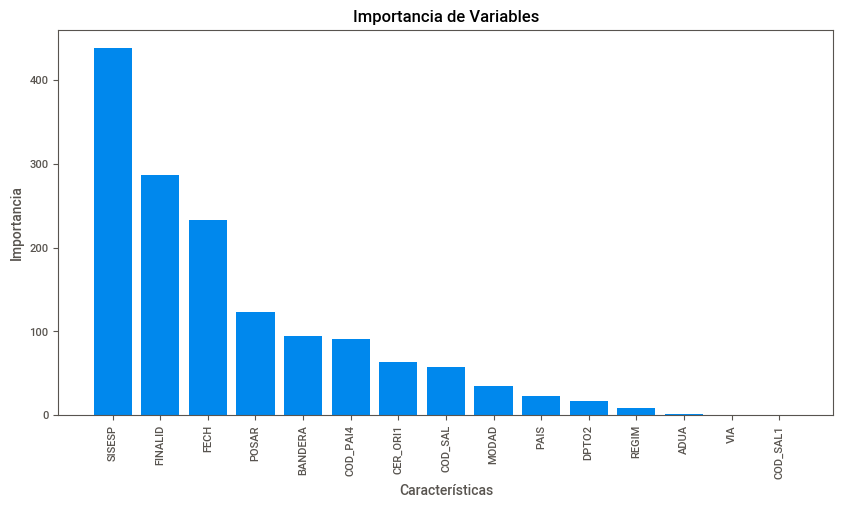

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
3795  1901     3  245      ESP         3     BOG     11    4      245      1   
4434  1901     3  249      USA         3     BOG     11    4      169      1   
4442  1901     3  249      USA         3     BOG     11    4      169      1   
5652  1901     3  249      USA         3     BOG     17    4      169      1   
5653  1901     3  249      USA         3     BOG     17    4      169      1   

      ...  UNID  CODUNI2  CANTI    PNK        FOBPES  AGRENA  FLETES SEGURO  \
3795  ...    33       KG   3.52   3.52  4.078438e+08     0.0     0.0    0.0   
4434  ...    33       KG   4.49   4.49  5.231243e+08     0.0     0.0    0.0   
4442  ...    33       KG   5.75   5.75  6.408555e+08     0.0     0.0    0.0   
5652  ...    33       KG   1.73   1.73  2.074007e+08     0.0     0.0    0.0   
5653  ...    33       KG  14.00  14.00  1.745118e+09     0.0     0.0    0.0   

      OTROSG            

d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² Score: 0.9738
RMSE: 522723.0576
MAE: 45380.0997


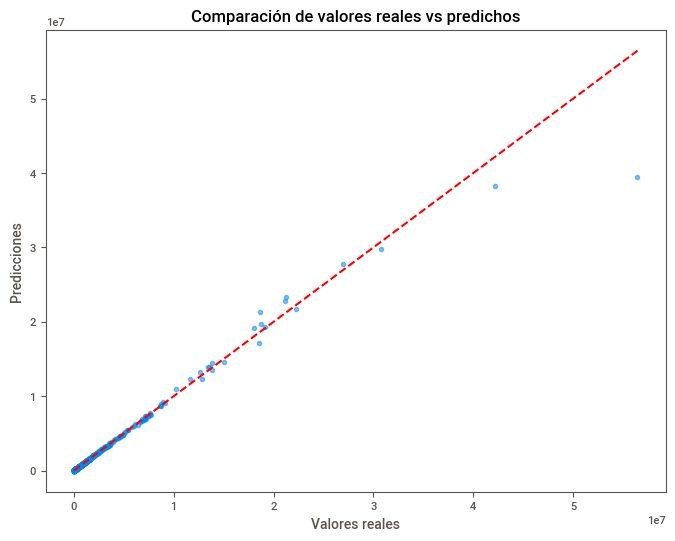

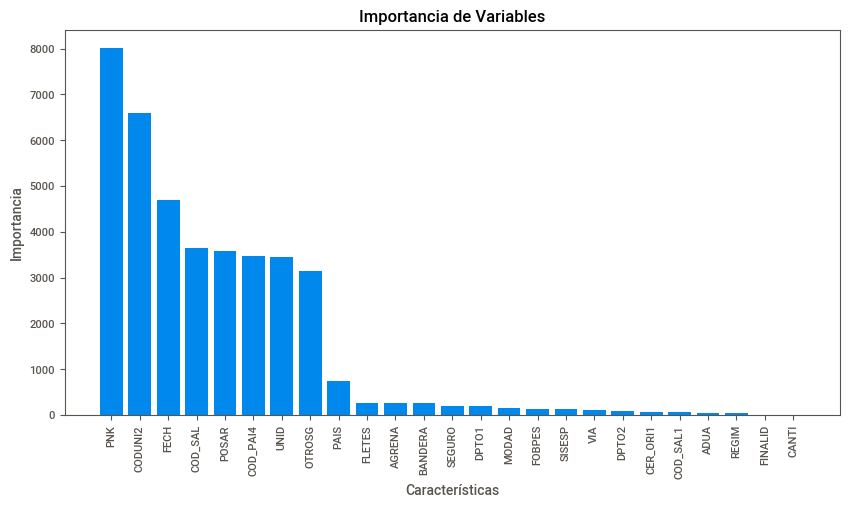

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
129   1901     3   23      DEU         3     BOG     25    4      245      1   
233   1901     3   27      ABW         3     BOG     66    4      211      1   
382   1901     3   69      AUS         3     BOG     25    4      249      1   
1279  1901     3  169      COL         3     BOG     11    3      169      1   
1280  1901     3  169      COL         3     BOG     11    3      169      1   

      ...  UNID  CODUNI2   CANTI     PNK       FOBPES  AGRENA  FLETES SEGURO  \
129   ...    33       KG  2485.0  2485.0  37456186.32     0.0  3082.0   0.00   
233   ...    33       KG  2000.0  2000.0  46800144.00     0.0     0.0   0.00   
382   ...    33       KG   139.0   139.0  45249279.58     0.0   989.0  90.14   
1279  ...    33       KG   144.0   144.0   5944552.64     0.0     0.0   0.00   
1280  ...    33       KG    76.5    76.5   2266376.23     0.0     0.0   0.00   

      OTROSG      

d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


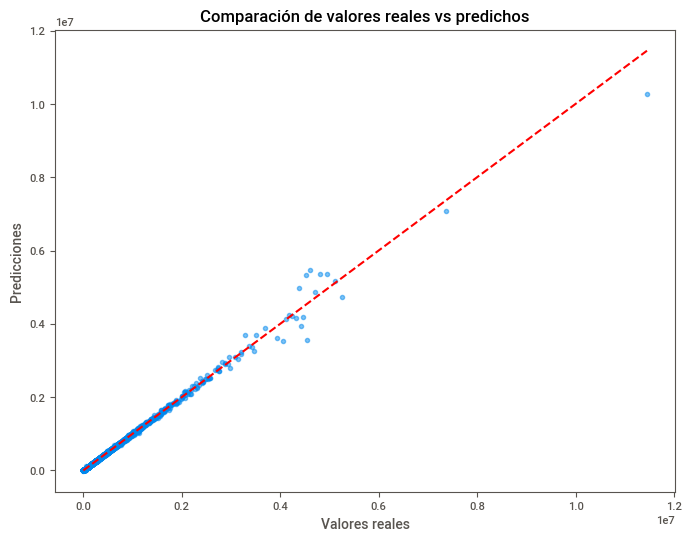

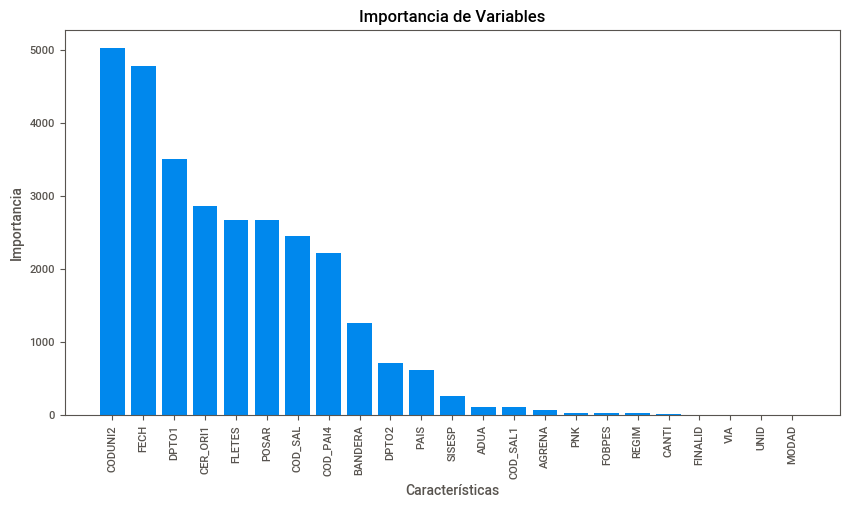

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
      FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
3     1901     3   23      DEU         3     BOG      5    4       23      1   
121   1901     3   23      DEU         3     BOG     25    4      105      1   
420   1901     3   87      BEL         3     BOG      5    4      245      1   
3649  1901     3  244      ARE         3     BOG     25    4      275      1   
3696  1901     3  245      ESP         3     BOG      5    4      245      1   

      ...  UNID  CODUNI2   CANTI     PNK       FOBPES  AGRENA  FLETES SEGURO  \
3     ...    33       KG     6.0     6.0     93235.34   29.50     0.0    0.0   
121   ...    33       KG  3618.0  3618.0  55295255.66    0.00     0.0    0.0   
420   ...    33       KG    45.0    45.0    656598.03  207.75     0.0    0.0   
3649  ...    33       KG     6.0     6.0     18903.48    0.00     0.0    0.0   
3696  ...    33       KG   120.0   120.0   1707945.00  540.40     0.0    0.0   

      OTROSG      

d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


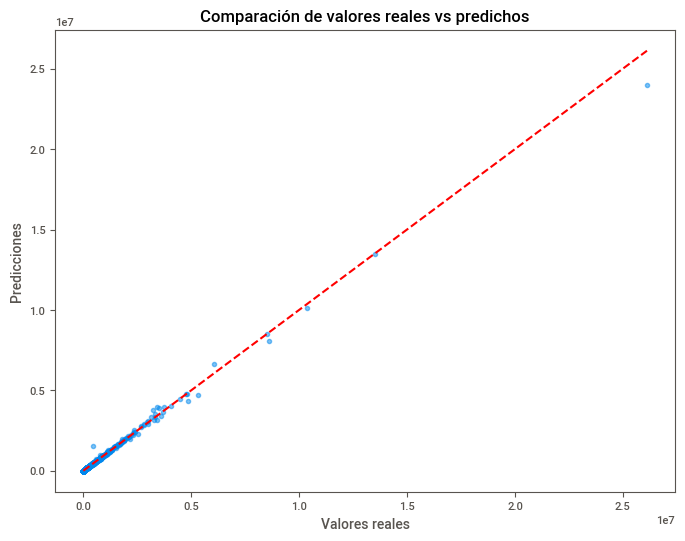

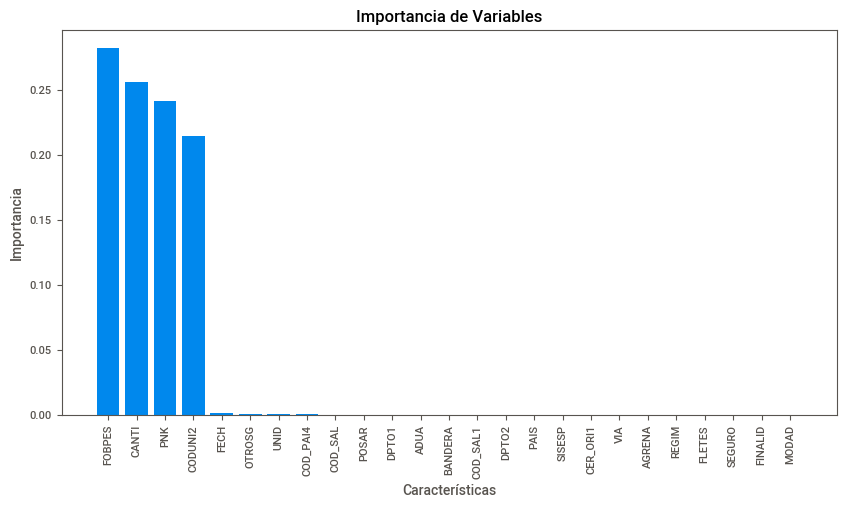

C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
C:\Users\frany\AppData\Local\Temp\ipykernel_13268\3014003025.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBDD2_.drop(columns=['PROD'], inplace=True)


🔹 Datos originales:
    FECH  ADUA PAIS COD_PAI4  COD_SAL1 COD_SAL  DPTO2  VIA  BANDERA  REGIM  \
11  1901     3   23      DEU         3     BOG      5    4      249      1   
12  1901     3   23      DEU         3     BOG      5    4      253      1   
17  1901     3   23      DEU         3     BOG     11    4       23      1   
19  1901     3   23      DEU         3     BOG     11    4       23      1   
20  1901     3   23      DEU         3     BOG     11    4       23      1   

    ...  UNID  CODUNI2    CANTI     PNK       FOBPES   AGRENA  FLETES SEGURO  \
11  ...    11        U   2275.0   390.0   2782047.73     0.00     0.0    0.0   
12  ...    11        U   1800.0   226.0   3464117.80     0.00     0.0    0.0   
17  ...    11        U   5180.0   407.5   5297353.14  1568.95     0.0    0.0   
19  ...    11        U  13650.0   379.0   7011898.32     0.00     0.0    0.0   
20  ...    11        U  56000.0  1795.0  28579336.70     0.00     0.0    0.0   

    OTROSG                    

d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Programs\Anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R² Score: 0.9966
RMSE: 14926.8838
MAE: 2214.2717


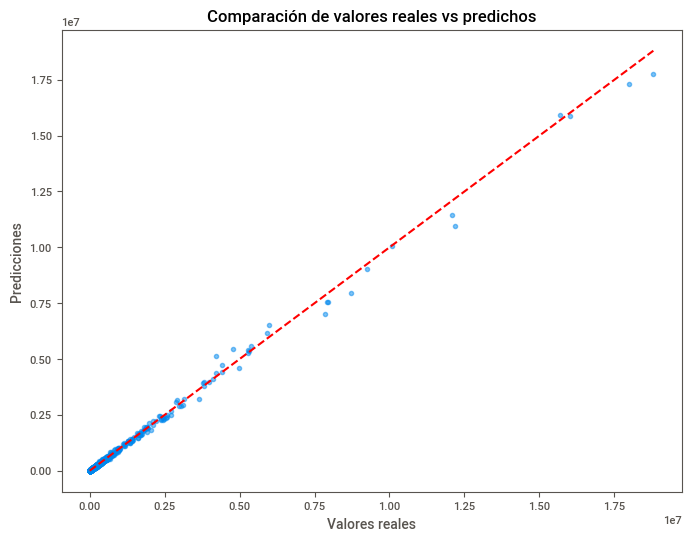

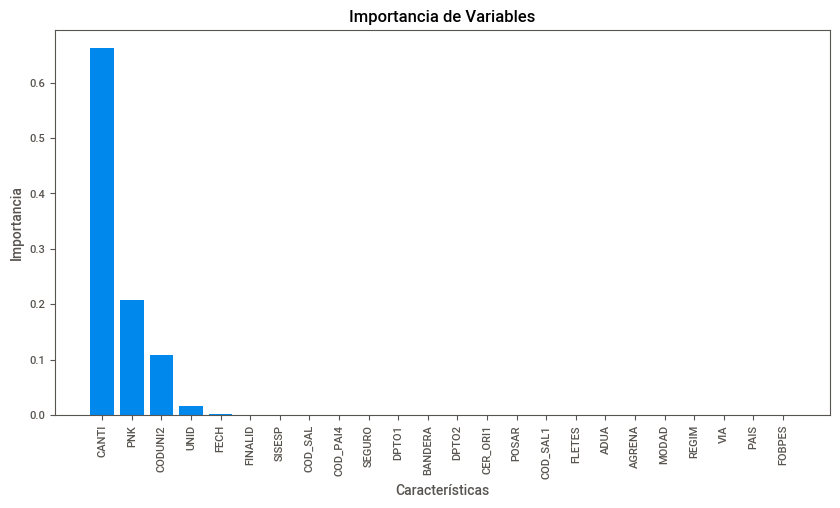

In [145]:
# productos_selec = top_productos.index.tolist() , '0603', '0901', '0810', '3004', '3304', '3305', '3923', '6104', '6204', '6212'
# productos_selec = ['2709', '2701' , '7108', '2710', '0803', '2704', '7610', '7202']
# 2709 - 0
# 7108 - 2
# 0901 - 2 - otro
# 0803 - 4
# 0603 - 0 - otro
productos_selec = ['2709', '7108', '0901', '0803', '0603']
automl_best_estimator_ = list()
automl_best_estimator_ = list()
y_pred_ = list()
r2_ = list()
rmse_ = list()
mae_ = list()
for producto in productos_selec:
    bbdd2 = bbdd_final.dropna()
    bbdd2.drop(columns=['PBK', 'NIT'], inplace=True)
    BBDD2_ = bbdd2[bbdd2.PROD==producto]
    BBDD2_.drop(columns=['PROD'], inplace=True)

    # 3️⃣ Eliminar filas con valores nulos
    df = BBDD2_.dropna()

    # 4️⃣ Separar variable objetivo
    target_column = "FOBDOL"
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # 5️⃣ Crear el transformador RDT 🚀
    ht = HyperTransformer()

    # 6️⃣ Detectar configuración automáticamente ✅
    ht.detect_initial_config(X)

    # 7️⃣ Ajustar y transformar los datos 🔄
    ht.fit(X)
    X_transformed = ht.transform(X)

    # 8️⃣ Convertir a DataFrame para visualizar 🔍
    X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

    # 9️⃣ Mostrar comparación antes y después de la transformación
    print("🔹 Datos originales:")
    print(X.head())

    print("\n🔹 Datos transformados:")
    print(X_transformed.head())

    # 🔟 Separar en entrenamiento y prueba con partición de 80% de entrenamiento y 20% de validación
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    from flaml import AutoML

    # Inicializar AutoML
    automl = AutoML()

    # Configurar y entrenar FLAML
    automl.fit(
        X_train, y_train,    # datos de entrenamiento
        task="regression",   # Tipo de problema
        time_budget=300,     # Tiempo límite en segundos (ajustar según tu caso)
        metric="r2",         # Métrica para evaluar (puedes cambiar a 'rmse', 'mae', etc.)
        verbose=1            # Mostrar logs de entrenamiento
    )

    # Ver el mejor modelo encontrado
    print("Mejor modelo encontrado:", automl.best_estimator)

    # Hacer predicciones con el modelo optimizado
    y_pred = automl.predict(X_test)

    # Evaluar el modelo
    from sklearn.metrics import mean_squared_error, r2_score

    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

    print("Mejor modelo encontrado:", automl.best_estimator)
    print("Mejores parámetros del modelo:", automl.best_config)

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Hacer predicciones en el conjunto de prueba
    y_pred = automl.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    automl_best_estimator_.append(automl.best_estimator)
    automl_best_estimator_.append(automl.best_estimator)
    y_pred_.append(y_pred)
    r2_.append(r2)
    rmse_.append(rmse)
    mae_.append(mae)

    # Mostrar métricas
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Línea ideal
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Comparación de valores reales vs predichos")
    plt.savefig(f"comparacion_{producto}.png")
    plt.show()

    import numpy as np

    # Obtener importancia de variables si está disponible
    if hasattr(automl.model, "feature_importances_"):
        importances = automl.model.feature_importances_
        feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

        sorted_indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 5))
        plt.bar(range(len(importances)), importances[sorted_indices], align="center")
        plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
        plt.xlabel("Características")
        plt.ylabel("Importancia")
        plt.title("Importancia de Variables")
        plt.savefig(f"importancia_{producto}.png")
        plt.show()



In [21]:
import pickle
# automl_best_estimator_.append(automl.best_estimator)
# y_pred_.append(y_pred)
# r2_.append(r2)
# rmse_.append(rmse)
# mae_.append(mae)

# Crear un diccionario con todas las listas
data_to_save = {
    "automl_best_estimator": automl_best_estimator_,
    "y_pred": y_pred_,
    "r2": r2_,
    "rmse": rmse_,
    "mae": mae_,
}

# Guardar en un archivo .pkl
with open("automl_results_v2.pkl", "wb") as file:
    pickle.dump(data_to_save, file)

7982556536.568123

In [ ]:
with open("automl_results.pkl", "rb") as file:
    loaded_data = pickle.load(file)

# Acceder a los datos
print(loaded_data["r2"])  # Mostrará la lista de valores R²

In [ ]:
loaded_data['automl_best_estimator']

{'automl_best_estimator': ['lgbm',
  'lgbm',
  'extra_tree',
  'extra_tree',
  'lgbm',
  'lgbm',
  'xgb_limitdepth',
  'xgb_limitdepth',
  'extra_tree',
  'extra_tree',
  'xgb_limitdepth',
  'xgb_limitdepth',
  'extra_tree',
  'extra_tree',
  'extra_tree',
  'extra_tree'],
 'y_pred': [array([ 1.61403403e+06,  3.01716254e+07,  1.52710751e+06,  2.31408842e+08,
          5.78955423e+06,  3.04132072e+07,  3.04646317e+07,  3.51533475e+07,
          2.08709990e+06,  2.99088545e+07,  2.50895355e+07,  3.86240931e+07,
          2.39337056e+07,  7.79712484e+07,  3.01460770e+07,  1.36332933e+08,
          2.96550121e+07,  3.29240017e+07,  3.68928500e+06,  1.02828770e+07,
          1.60681304e+08,  3.26008239e+07,  1.09686499e+07,  2.16849824e+08,
          2.16213132e+08,  4.75697256e+08,  3.74201999e+08,  7.42191386e+05,
          2.27251625e+07, -3.62529824e+05,  2.53771503e+07,  6.22355381e+06,
          3.08720142e+07,  2.36834163e+07,  3.23012329e+07,  1.70103745e+07,
          3.04844192e+0

## otros

In [ ]:
bbdd_final = pd.concat([bbdd4, bbdd5, bbdd6])
bbdd_final.drop(columns=['PBK', 'NIT'], inplace=True)
BBDD3_ = bbdd_final[bbdd_final.PROD==603]


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from rdt import HyperTransformer

# 3️⃣ Eliminar filas con valores nulos
df = BBDD3_.dropna()

# 4️⃣ Separar variable objetivo
target_column = "FOBDOL"
X = df.drop(columns=[target_column])
y = df[target_column]

# 5️⃣ Crear el transformador RDT 🚀
ht = HyperTransformer()

# 6️⃣ Detectar configuración automáticamente ✅
ht.detect_initial_config(X)

# 7️⃣ Ajustar y transformar los datos 🔄
ht.fit(X)
X_transformed = ht.transform(X)

# 8️⃣ Convertir a DataFrame para visualizar 🔍
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

# 9️⃣ Mostrar comparación antes y después de la transformación
print("🔹 Datos originales:")
print(X.head())

print("\n🔹 Datos transformados:")
print(X_transformed.head())

# 🔟 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
from flaml import AutoML

# Inicializar AutoML
automl = AutoML()

# Configurar y entrenar FLAML
automl.fit(
    X_train, y_train,
    task="regression",   # Tipo de problema
    time_budget=300,     # Tiempo límite en segundos (ajustar según tu caso)
    metric="r2",         # Métrica para evaluar (puedes cambiar a 'rmse', 'mae', etc.)
    verbose=1            # Mostrar logs de entrenamiento
)

# Ver el mejor modelo encontrado
print("Mejor modelo encontrado:", automl.best_estimator)

# Hacer predicciones con el modelo optimizado
y_pred = automl.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


In [ ]:
print("Mejor modelo encontrado:", automl.best_estimator)


print("Mejores parámetros del modelo:", automl.best_config)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = automl.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar métricas
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predichos")
plt.show()


import numpy as np

# Obtener importancia de variables si está disponible
if hasattr(automl.model, "feature_importances_"):
    importances = automl.model.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

    sorted_indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(importances)), importances[sorted_indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.title("Importancia de Variables")
    plt.show()


In [ ]:
%pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
from rdt import HyperTransformer
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Cargar los datos originales
df = BBDD2_.dropna()  # Eliminar filas con valores nulos

# 2️⃣ Separar variable objetivo
target = "FOBDOL"
X = df.drop(columns=[target])
y = df[target]

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(X)  # Detectar configuración
ht.fit(X)  # Ajustar
X_transformed = ht.transform(X)  # Transformar

# 4️⃣ Convertir a DataFrame para compatibilidad con H2O
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)
df_transformed = X_transformed.copy()
df_transformed[target] = y  # Agregar la variable objetivo

# 5️⃣ Iniciar H2O
h2o.init()

# 6️⃣ Convertir el DataFrame transformado a formato H2O
df_h2o = h2o.H2OFrame(df_transformed)

# 7️⃣ Dividir en entrenamiento y prueba
train, test = df_h2o.split_frame(ratios=[0.8])

# 8️⃣ Definir el objetivo y las variables predictoras
features = df_h2o.columns.remove(target)

# 9️⃣ Configurar AutoML para regresión
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=features, y=target, training_frame=train)

# 🔟 Mostrar el mejor modelo encontrado
print("🔹 Mejor modelo encontrado:")
print(aml.leader)

# 🔹 Mostrar la tabla de clasificación de modelos
lb = aml.leaderboard
print(lb)

# 🔹 Obtener el mejor modelo
best_model = aml.leader

# 🔹 Hacer predicciones en el conjunto de prueba
predictions = best_model.predict(test)

# 🔹 Mostrar algunas predicciones
print(predictions.head())

# 🔹 Evaluar el modelo
performance = best_model.model_performance(test)
print("🔹 RMSE:", performance.rmse())
print("🔹 R² Score:", performance.r2())

# 🔹 Gráfico de importancia de variables
best_model.varimp_plot()

# 📊 **Graficar Valores Reales vs. Predicciones**
y_test = test[target].as_data_frame().values.flatten()  # Convertir a NumPy
y_pred = predictions.as_data_frame().values.flatten()  # Convertir a NumPy

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Línea Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales (Mejor Modelo)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
